In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader,Dataset
import torch.optim as optim
from matplotlib import pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
df=pd.read_csv("/content/fmnist_small.csv")

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [ ]:
df.shape

(6000, 785)

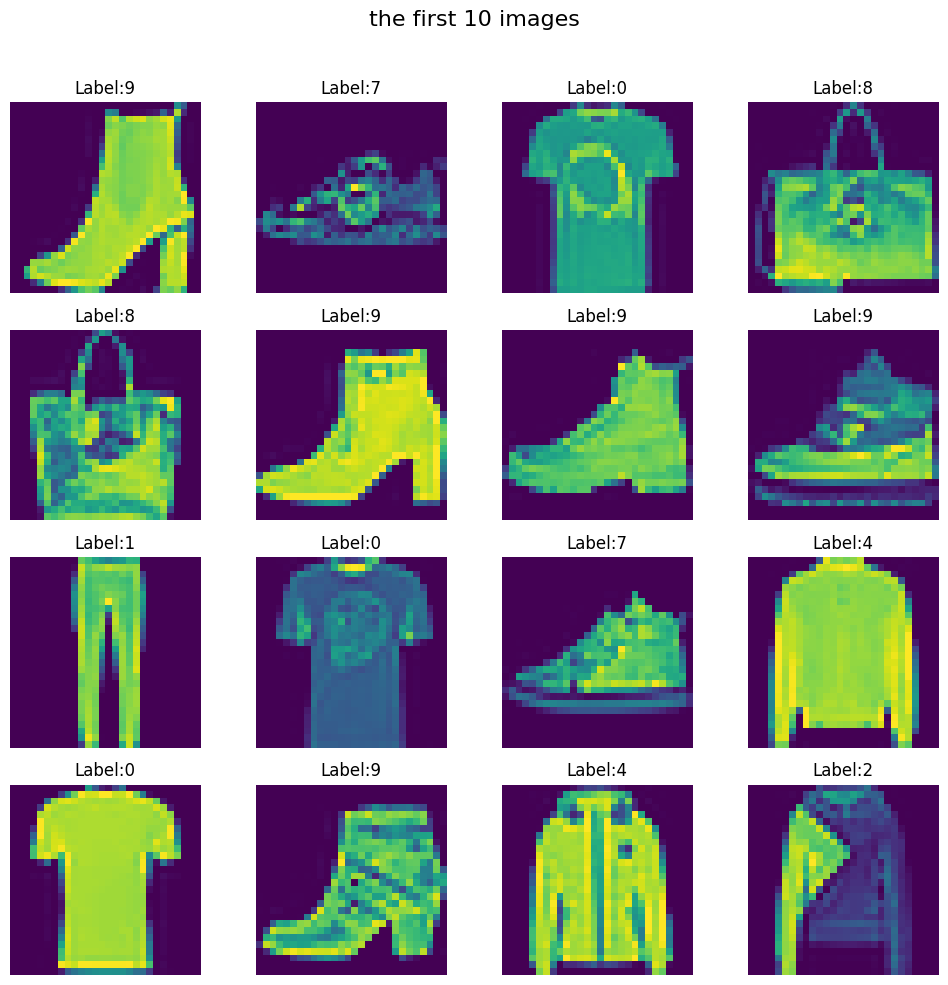

In [ ]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("the first 10 images",fontsize=16)

for (i,ax) in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"Label:{df.iloc[i,0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


In [ ]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [ ]:
x

array([[  0,   0,   0, ..., 165,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [ ]:
y

array([9, 7, 0, ..., 8, 4, 8])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
 #scaling the features
 x_train=x_train/255.0
 x_test=x_test/255.0

In [ ]:
x_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [ ]:
class MyDataset(Dataset):
  def __init__(self,features,labels):
    self.features=torch.tensor(features,dtype=torch.float32)
    self.labels=torch.tensor(labels,dtype=torch.long)
  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index],self.labels[index]

In [ ]:
train_dataset=MyDataset(x_train,y_train)
test_dataset=MyDataset(x_test,y_test)

train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True,num_workers=10)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=False,num_workers=10)


In [ ]:
class Model(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.network=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )
  def forward(self,features):
    x=self.network(features)
    return x

In [ ]:
epochs=100
learning_rate=0.01
model=Model(x_train.shape[1])
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)


In [ ]:
for epoch in range(epochs):
  per_loss=0
  for batch_features,batch_labels in train_loader:
    outputs=model(batch_features)
    loss=loss_fn(outputs,batch_labels)
    per_loss+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"epoch{epoch+1} avgloss={per_loss/len(train_loader)}")


epoch1 avgloss=2.282497984568278
epoch2 avgloss=2.2287109502156577
epoch3 avgloss=2.134586664835612
epoch4 avgloss=1.9548028341929118
epoch5 avgloss=1.689172797203064
epoch6 avgloss=1.440316104888916
epoch7 avgloss=1.2626615365346272
epoch8 avgloss=1.1406210843722027
epoch9 avgloss=1.053902325630188
epoch10 avgloss=0.9900503993034363
epoch11 avgloss=0.9400952164332071
epoch12 avgloss=0.9014989662170411
epoch13 avgloss=0.871589781443278
epoch14 avgloss=0.8421590638160705
epoch15 avgloss=0.81769739707311
epoch16 avgloss=0.796954824924469
epoch17 avgloss=0.7792675145467123
epoch18 avgloss=0.762760439713796
epoch19 avgloss=0.747805248896281
epoch20 avgloss=0.7332802486419677
epoch21 avgloss=0.7183194434642792
epoch22 avgloss=0.7066020238399505
epoch23 avgloss=0.6948032307624817
epoch24 avgloss=0.6846579559644064
epoch25 avgloss=0.6733117310206095
epoch26 avgloss=0.6654160412152609
epoch27 avgloss=0.6530101911226909
epoch28 avgloss=0.6470116897424062
epoch29 avgloss=0.6386224003632863
epoch

In [ ]:
model.eval()

Model(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
y_test.shape

(1200,)

In [ ]:
model.eval()
total=0
correct=0
with torch.no_grad():
  for batch_features,batch_labels in test_loader:
    output=model(batch_features) # Use the output from the current test batch
    _,predicted=torch.max(output,1) # Get predictions from the current batch output
    total=total+batch_labels.shape[0]
    correct=correct+(predicted==batch_labels).sum().item()

print(f"Test Accuracy: {correct/total:.4f}")

Test Accuracy: 0.8050
